In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1

In [2]:
df = pd.read_csv('water.csv', index_col=0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


## Корреляция

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

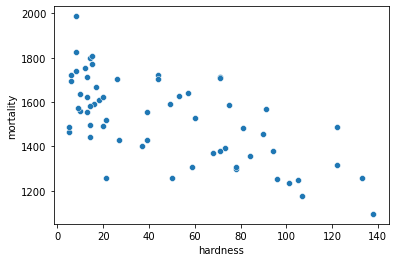

In [3]:
sns.scatterplot(x=df.hardness, y=df.mortality)

In [4]:
print("Pearson's r:", df.corr().iloc[1, 0])
print("Spearman's ρ:", df.corr(method='spearman').iloc[1, 0])

Pearson's r: -0.6548486232042469
Spearman's ρ: -0.6316646189166502


## Регрессия

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
X = df[['hardness']]
y = df['mortality']

In [7]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
print('R2:', model.score(X, y))

R2: 0.4288267193124974


In [9]:
y_pred = model.predict(X)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

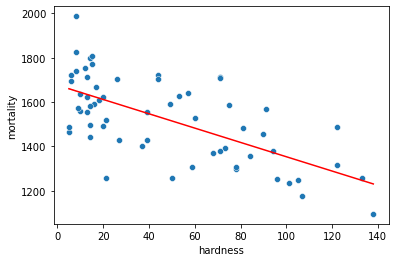

In [10]:
sns.scatterplot(x=X['hardness'], y=y)
sns.lineplot(x=X['hardness'], y=y_pred, color='r')

## Остатки

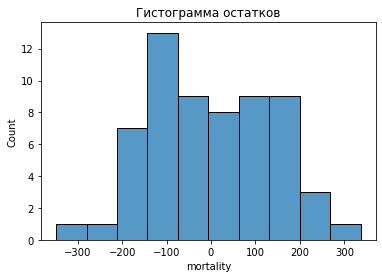

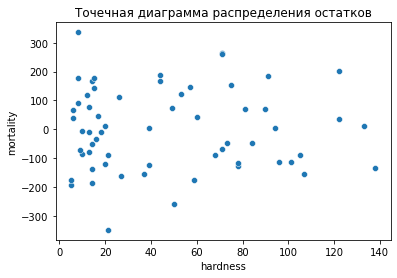

In [11]:
sns.histplot(df['mortality'] - y_pred, bins=10)
plt.title('Гистограмма остатков')
plt.show()

sns.scatterplot(x=X['hardness'], y=df['mortality'] - y_pred)
plt.title('Точечная диаграмма распределения остатков')
plt.show()

### Есть ли связь между жёсткостью воды и средней годовой смертностью?

Коэффициенты корреляции достаточно близки к `-1` для того, чтобы говорить о возможном наличии обратной взаимосвязи между жесткостью воды и средней годовой смертностью в рассматриваемых городах.
 - Pearson's r:  -0.655
 - Spearman's ρ:  -0.63

Коэффициент детерминации построенной модели линейной регрессии недостаточно высокий для того, чтобы говорить о линейной зависимости между этими показателями.
 - R2 = 0.43

Вероятно зависимость средней годовой смертности от жесткости воды может быть нелинейной.

# Задание 2

In [12]:
south = df[df.location == 'South']
north = df[df.location == 'North']

## Корреляция

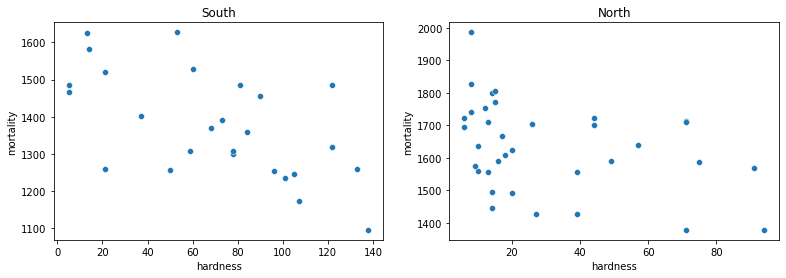

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.scatterplot(x=south.hardness, y=south.mortality, ax=axs[0]).set_title('South')
sns.scatterplot(x=north.hardness, y=north.mortality, ax=axs[1]).set_title('North')

plt.show()

In [14]:
print("South Pearson's r: ", south.corr().iloc[1, 0])
print("South Spearman's ρ: ", south.corr(method='spearman').iloc[1, 0])
print()
print("North Pearson's r: ", north.corr().iloc[1, 0])
print("North Spearman's ρ: ", north.corr(method='spearman').iloc[1, 0])

South Pearson's r:  -0.6021532715484159
South Spearman's ρ:  -0.5957229185013566

North Pearson's r:  -0.3685978383288716
North Spearman's ρ:  -0.4042078956511175


## Регрессия

In [15]:
X_south = south[['hardness']]
y_south = south['mortality']

X_north = north[['hardness']]
y_north = north['mortality']

In [16]:
model_south = LinearRegression()
model_south.fit(X_south, y_south)

model_north = LinearRegression()
model_north.fit(X_north, y_north)

LinearRegression()

In [17]:
print('South R2:', model_south.score(X_south, y_south))
print('North R2:', model_north.score(X_north, y_north))

South R2: 0.3625885624364601
North R2: 0.1358643664207173


In [18]:
y_pred_south = model_south.predict(X_south)
y_pred_north = model_north.predict(X_north)

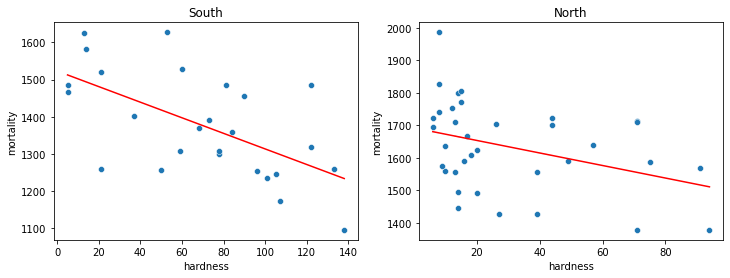

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x=X_south['hardness'], y=y_south, ax=axs[0])
sns.lineplot(x=X_south['hardness'], y=y_pred_south, color='r', ax=axs[0]).set_title('South')

sns.scatterplot(x=X_north['hardness'], y=y_north, ax=axs[1])
sns.lineplot(x=X_north['hardness'], y=y_pred_north, color='r', ax=axs[1]).set_title('North')

plt.show()

## Остатки

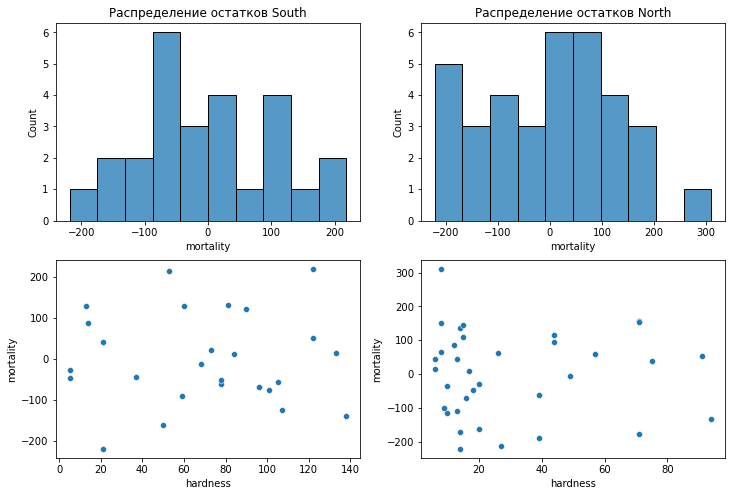

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(south['mortality'] - y_pred_south, bins=10, ax=axs[0, 0]).set_title('Распределение остатков South')
sns.scatterplot(x=X_south['hardness'], y=south['mortality'] - y_pred_south, ax=axs[1, 0])

sns.histplot(north['mortality'] - y_pred_north, bins=10, ax=axs[0, 1]).set_title('Распределение остатков North')
sns.scatterplot(x=X_north['hardness'], y=north['mortality'] - y_pred_north, ax=axs[1, 1])

plt.show()

### Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Коэффициенты корреляции по отдельности для южных и северных городов в обоих случаях ближе к нулю, чем коэффициенты объединенного датафрейма. Изменение в меньшей степени коснулось южных городов, коэффициенты для этого региона ниже -0.5, что говорит о более явной обратной взаимосвязи между жесткостью воды и средней годовой смертностью, чем в северных городах, где коэффициенты заметно ближе к нулю.
 - South Pearson's r:  -0.6021532715484159
 - South Spearman's ρ:  -0.5957229185013566
 - North Pearson's r:  -0.3685978383288716
 - North Spearman's ρ:  -0.4042078956511175

Коэффициенты детерминации построенных моделей линейной регрессии для севера и юга оказались еще меньше чем для объединенного датафрейма. В еще меньшей степени можно говорить о возможной линейной зависимости между исследуемыми показателями.
 - South R2: 0.3625885624364601
 - North R2: 0.1358643664207173

На мой взгляд нельзя по данному исследованию определенно сказать о наличии взаимосвязи между жесткостью воды и средней годовой смертностью. Данных не очень много, а полученные коэффициенты недостаточно убедительно говорят в пользу такой гипотезы. Рассмотрев также в отдельности два региона я увидел различия в распределении значений на точечных диаграммах. К примеру в большинстве северных городов вода не очень жесткая и не сильно различается по этому признаку, но в то же время разброс значений по смертности в таких городах с мягкой водой достаточно большой. В южных городах распределение по жесткости воды выглядит равномерным, но наблюдается бОльшая тенденция к снижению уровня смертности в городах с более жесткой водой.